In [4]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import pyfolio as pf

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [22]:
df = yf.download('AVGO', dt.datetime(2020, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,279.739120,282.524941,277.987028,282.428589,2032900
2020-01-03,278.153506,280.334853,275.148647,275.245026,2287000
2020-01-06,272.318973,275.008441,271.250196,274.833221,2078900
2020-01-07,276.173583,277.338713,273.545445,273.887115,1856500
2020-01-08,274.184974,274.631740,270.181437,270.470520,3197900


<AxesSubplot:xlabel='Date'>

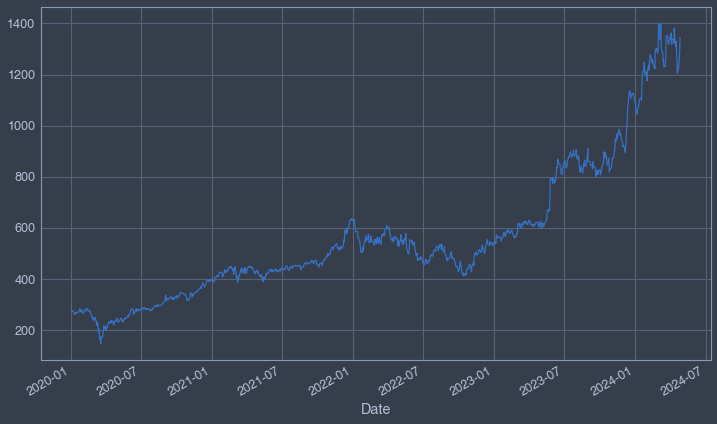

In [23]:
df['Close'].plot()

In [24]:
df['Close_std']  = df['Close'].rolling(window=30).std()

In [25]:
df

,Open,High,Low,Close,Volume,Close_std
Date,,,,,,
2020-01-02,279.739120,282.524941,277.987028,282.428589,2032900,NaN
2020-01-03,278.153506,280.334853,275.148647,275.245026,2287000,NaN
2020-01-06,272.318973,275.008441,271.250196,274.833221,2078900,NaN
2020-01-07,276.173583,277.338713,273.545445,273.887115,1856500,NaN
2020-01-08,274.184974,274.631740,270.181437,270.470520,3197900,NaN
...,...,...,...,...,...,...
2024-04-22,1224.500000,1233.199951,1200.540039,1224.459961,2516200,48.305357
2024-04-23,1228.170044,1257.900024,1228.020020,1249.189941,2202500,49.256874
2024-04-24,1263.900024,1285.619995,1244.959961,1256.819946,2010800,49.888180


In [50]:
df['Close_std_up'] = df['Close'] + df['Close_std'].shift(periods=5)
df['Close_std_bottom'] = df['Close'] - df['Close_std'].shift(periods=5)

<AxesSubplot:xlabel='Date'>

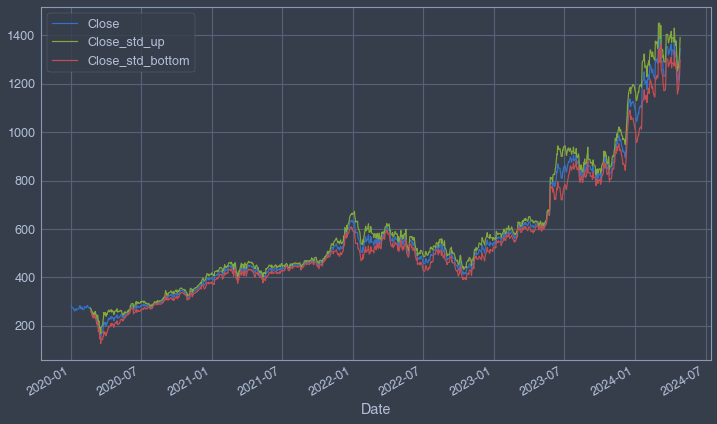

In [39]:
df[['Close', 'Close_std_up', 'Close_std_bottom']].plot()

<AxesSubplot:xlabel='Date'>

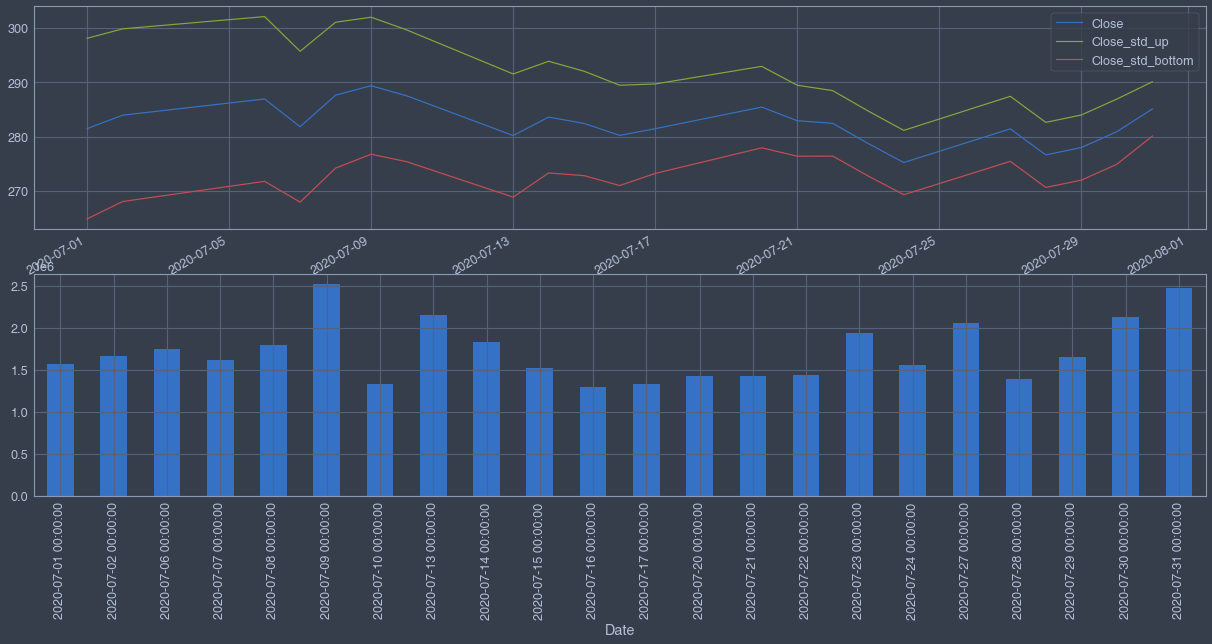

In [47]:
fig, ax = plt.subplots(2, figsize=(21, 10))
df[['Close', 'Close_std_up', 'Close_std_bottom']].loc['2020-07-01':'2020-07-31'].plot(ax=ax[0])
df['Volume'].loc['2020-07-01':'2020-07-31'].plot(kind='bar', ax=ax[1])

<AxesSubplot:xlabel='Date'>

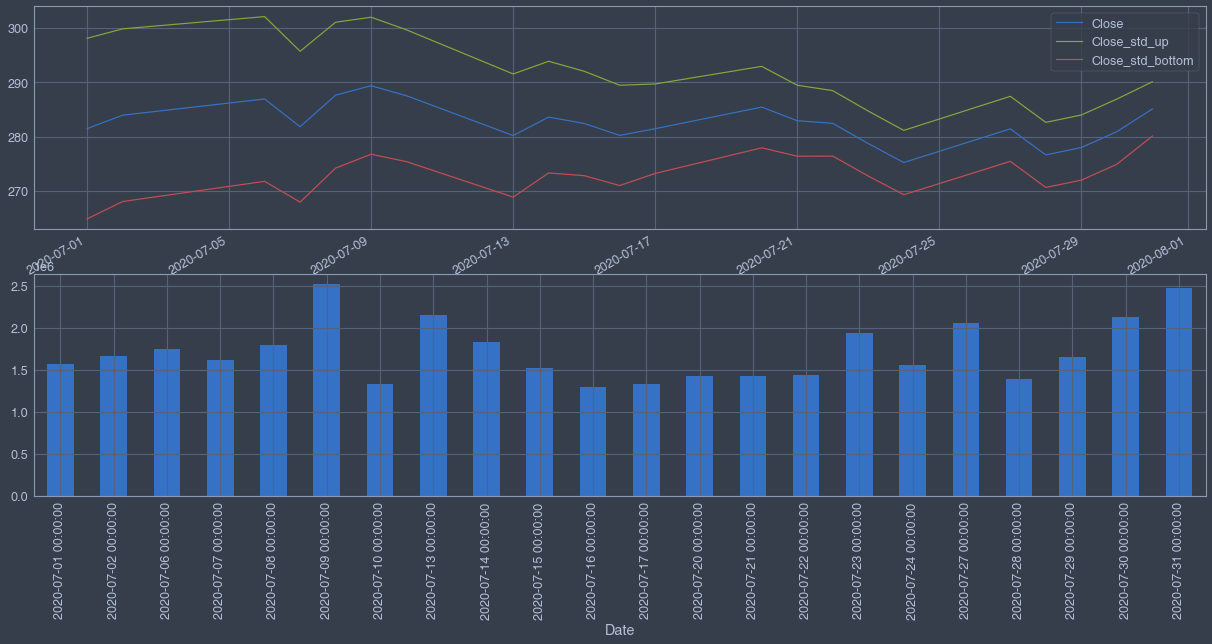

In [51]:
fig, ax = plt.subplots(2, figsize=(21, 10))
df[['Close', 'Close_std_up', 'Close_std_bottom']].loc['2020-07-01':'2020-07-31'].plot(ax=ax[0])
df['Volume'].loc['2020-07-01':'2020-07-31'].plot(kind='bar', ax=ax[1])